# Homework Starter — Stage 08 EDA

Fill in the marked TODOs. This notebook generates synthetic data so you can focus on the EDA flow. Replace with your dataset when ready.

In [22]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import skew, kurtosis
sns.set(context='talk', style='whitegrid')
np.random.seed(8)
pd.set_option('display.max_columns', 100)

# === Synthetic data generator (adapt or replace with your own data) ===
vix_data = pd.read_csv("../data/raw/api_index-vix_20250825-120356.csv")
apple_data = pd.read_csv("../data/raw/api_ticker-AAPL_20250824-162710.csv")
df = pd.DataFrame({
    'VIX.Close': vix_data["Close"],
    'AAPL.Close': apple_data["Close"],
    'AAPL.High': apple_data["High"],
    'AAPL.Low': apple_data["Low"],
    'AAPL.Open': apple_data["Open"],
    'AAPL.Volume': apple_data["Volume"],
    'AAPL.Returns': np.log(apple_data["Close"] / apple_data["Close"].shift(1))
})
# # inject a bit of missingness and outliers
# df.loc[np.random.choice(df.index, 5, replace=False), 'income'] = np.nan
# df.loc[np.random.choice(df.index, 3, replace=False), 'spend'] = np.nan
# df.loc[np.random.choice(df.index, 2, replace=False), 'transactions'] = df['transactions'].max()+12
# df.head()

## 1) First look

In [23]:
df.info(), df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   VIX.Close     1255 non-null   float64
 1   AAPL.Close    1255 non-null   float64
 2   AAPL.High     1255 non-null   float64
 3   AAPL.Low      1255 non-null   float64
 4   AAPL.Open     1255 non-null   float64
 5   AAPL.Volume   1255 non-null   int64  
 6   AAPL.Returns  1254 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 68.8 KB


(None,
 VIX.Close       0
 AAPL.Close      0
 AAPL.High       0
 AAPL.Low        0
 AAPL.Open       0
 AAPL.Volume     0
 AAPL.Returns    1
 dtype: int64)

## 2) Numeric profile

In [24]:
desc = df[list(df.columns)].describe().T
desc['skew'] = [skew(df[c].dropna()) for c in desc.index]
desc['kurtosis'] = [kurtosis(df[c].dropna()) for c in desc.index]
desc

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
VIX.Close,1255.0,1.997922e+01,5.581435e+00,1.186000e+01,1.589000e+01,1.884000e+01,2.305500e+01,5.233000e+01,1.037260,1.520456
AAPL.Close,1255.0,1.692936e+02,3.618348e+01,1.039252e+02,1.415703e+02,1.670870e+02,1.928875e+02,2.581037e+02,0.370615,-0.792224
AAPL.High,1255.0,1.710341e+02,3.634559e+01,1.071838e+02,1.433026e+02,1.683918e+02,1.943331e+02,2.591799e+02,0.375902,-0.797958
AAPL.Low,1255.0,1.673991e+02,3.592461e+01,1.002872e+02,1.396400e+02,1.655763e+02,1.913783e+02,2.567187e+02,0.363797,-0.799036
AAPL.Open,1255.0,1.691547e+02,3.609443e+01,1.016879e+02,1.408325e+02,1.673805e+02,1.928526e+02,2.572767e+02,0.374916,-0.796556
AAPL.Volume,1255.0,7.628000e+07,3.687643e+07,2.323470e+07,5.107115e+07,6.802880e+07,9.091130e+07,3.459376e+08,2.164894,8.185693
AAPL.Returns,1254.0,4.849817e-04,1.842687e-02,-9.701331e-02,-8.464719e-03,7.761079e-04,1.025508e-02,1.426174e-01,0.123564,4.835274


## 3) Distributions (TODO: add at least 3)

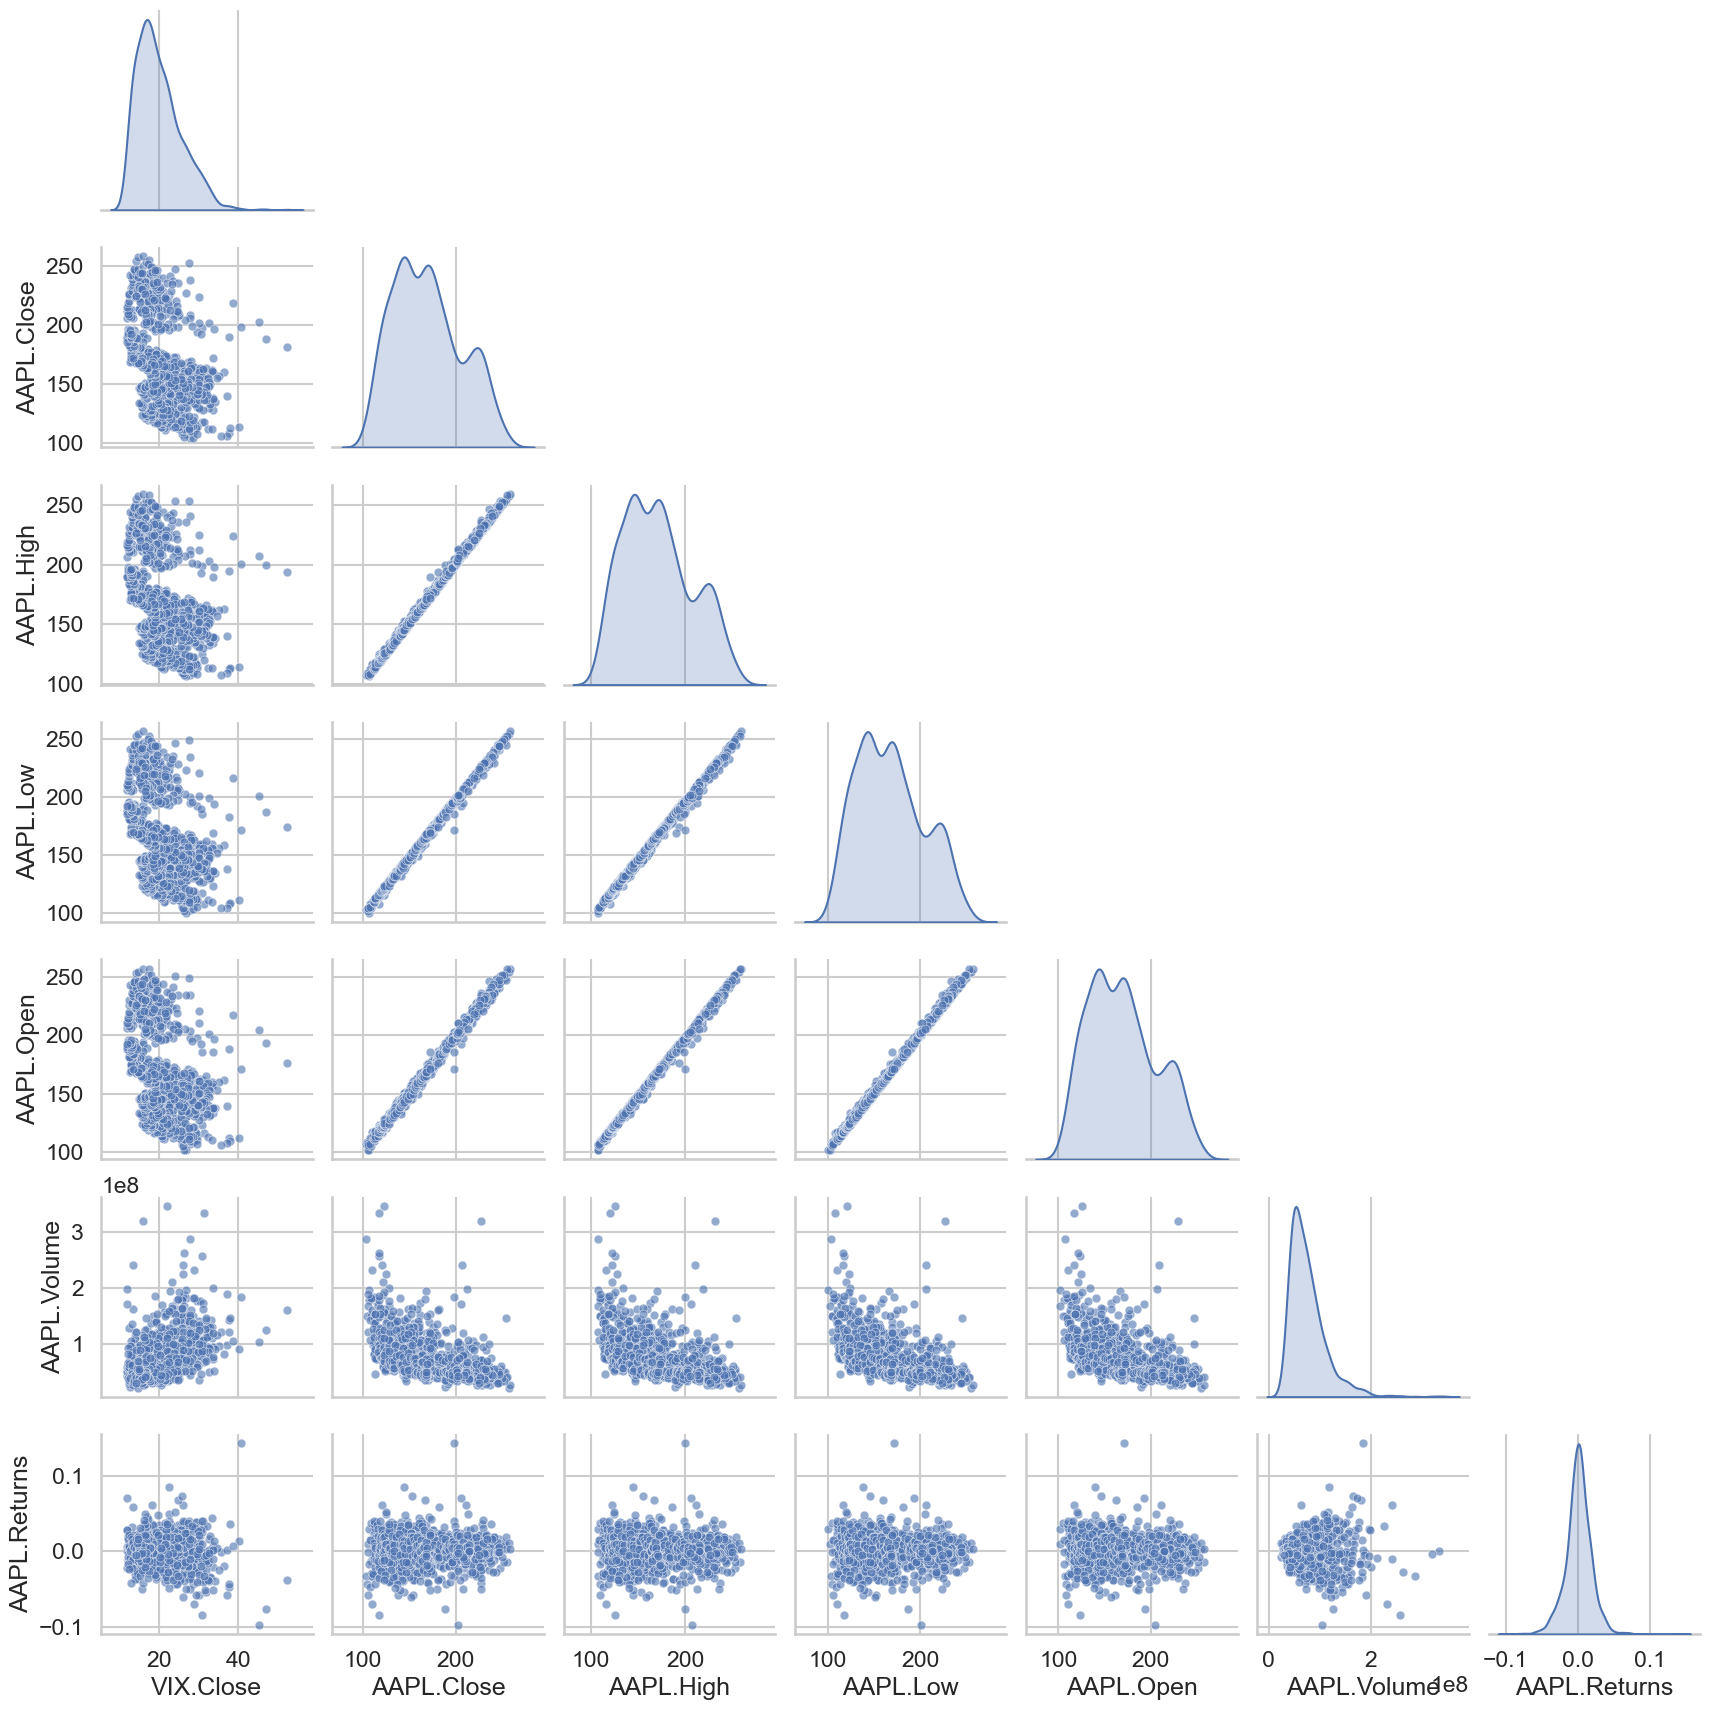

In [25]:
# TODO: histogram + KDE for a key variable
df_plot = df.copy()

g = sns.pairplot(
        df_plot, 
        diag_kind='kde', 
        corner=True,
        plot_kws={'alpha':0.6, 's':40}  # slight transparency and point size
            )


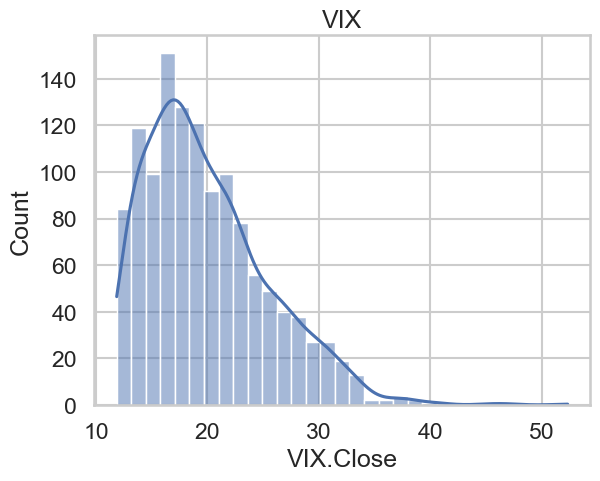

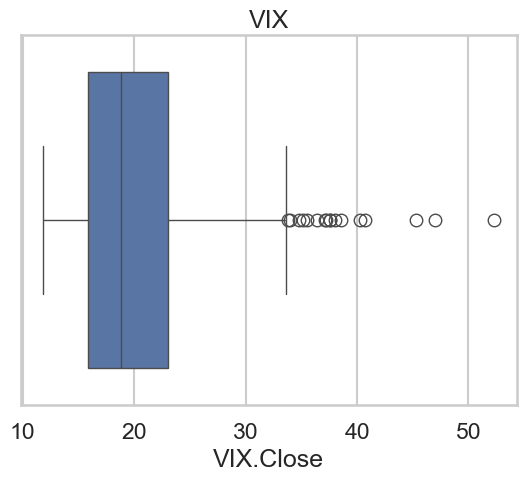

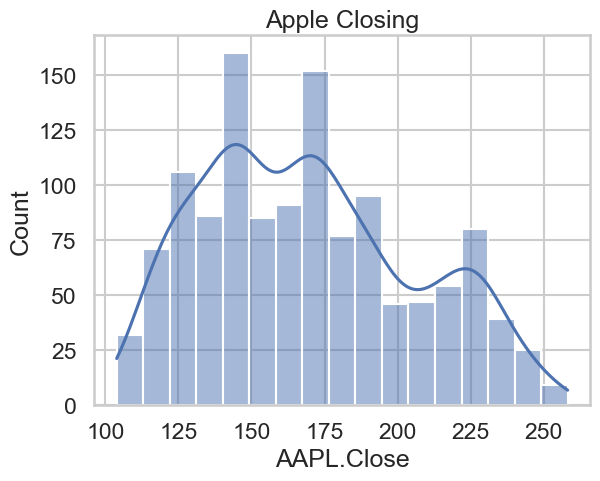

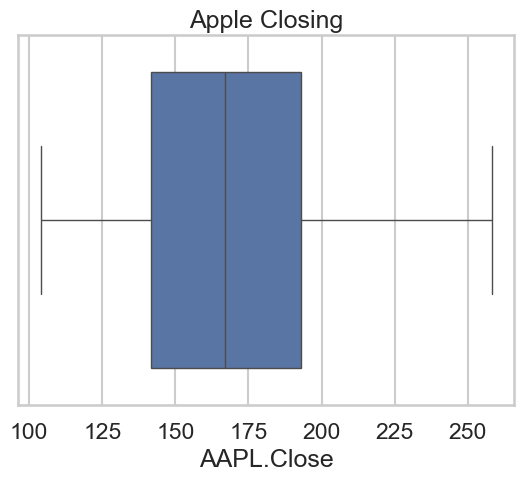

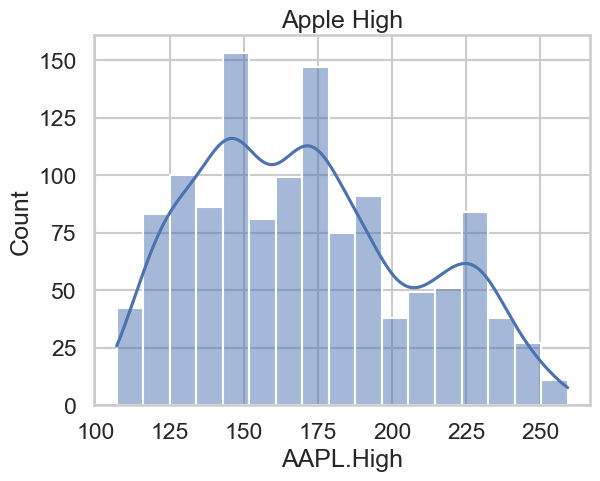

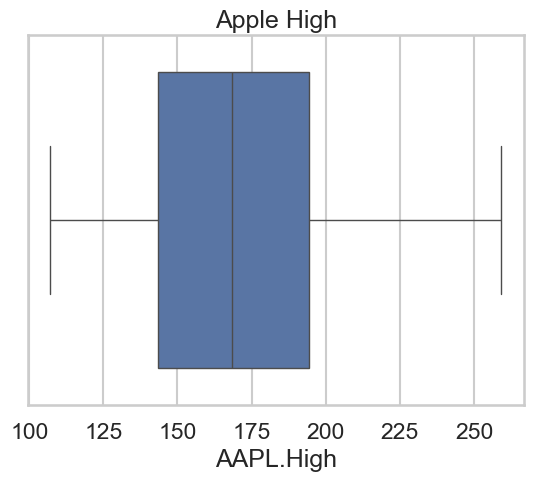

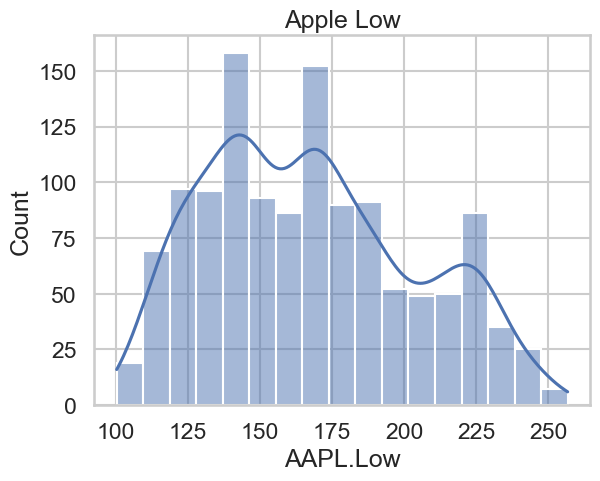

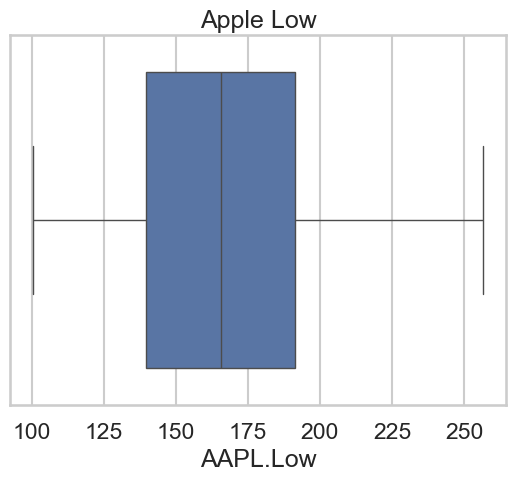

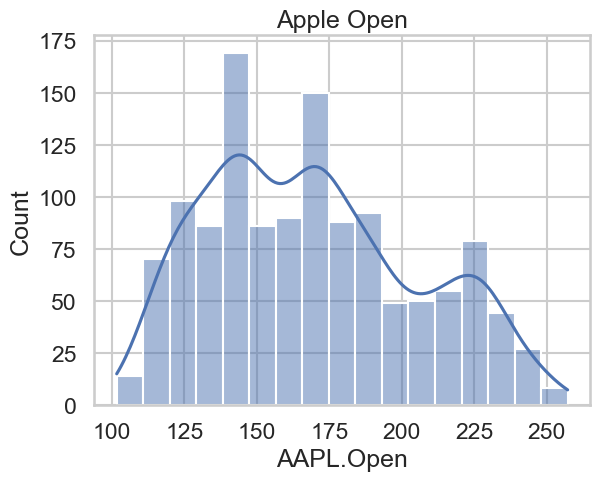

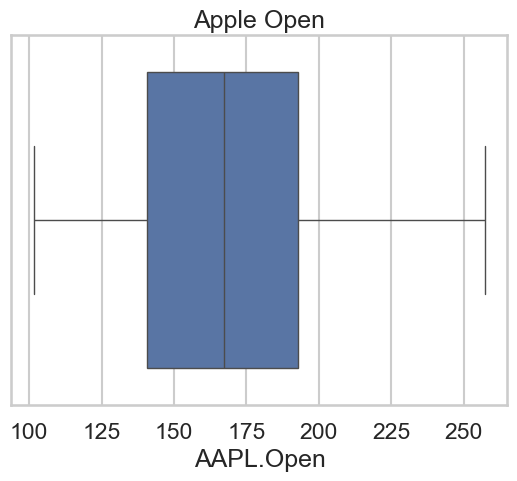

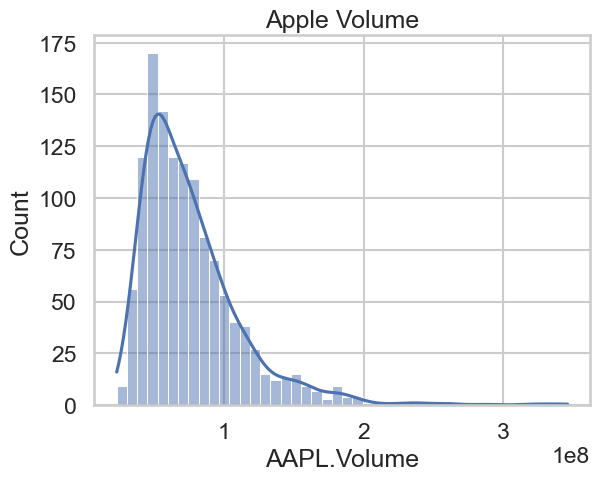

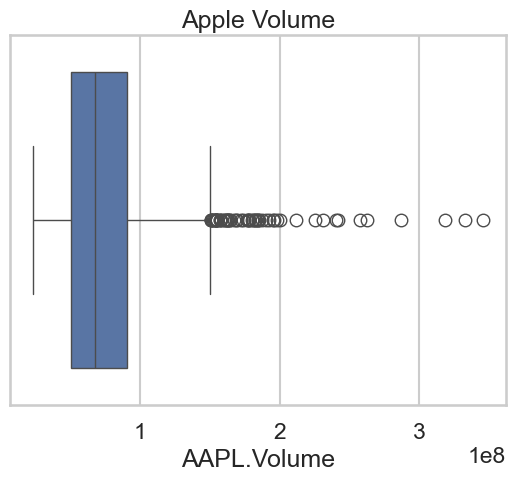

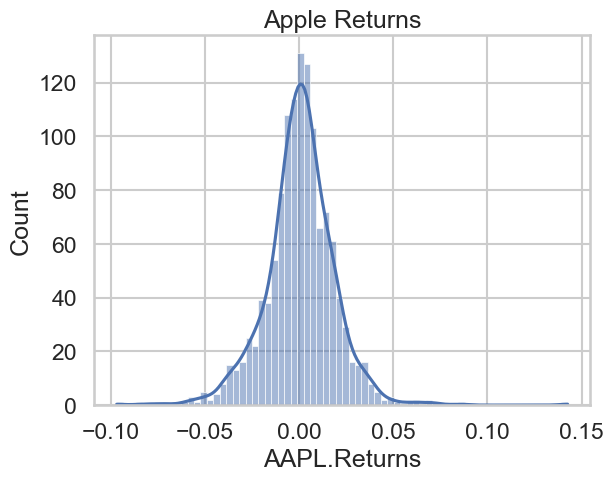

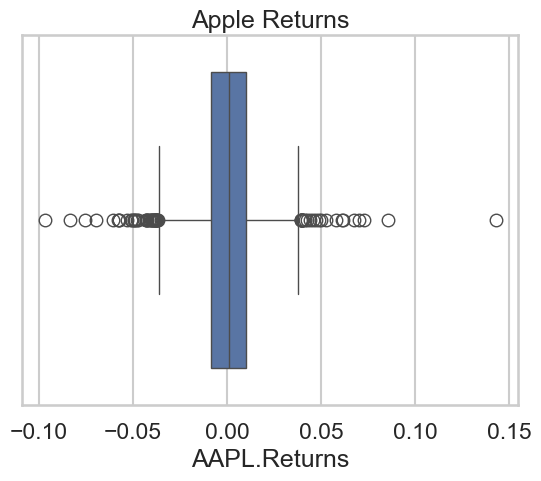

In [26]:
cols = list(df.columns)
name = { cols[0] : "VIX",
         cols[1] : "Apple Closing",
         cols[2] : "Apple High",
         cols[3] : "Apple Low",
         cols[4] : "Apple Open",
         cols[5] : "Apple Volume",
         cols[6] : "Apple Returns" }
for col in cols:
    sns.histplot(df[col], kde=True)
    plt.title(name[col])
    plt.show()
    sns.boxplot(x=df[col])
    plt.title(name[col])
    plt.show()

## 5) (Optional) Correlation matrix

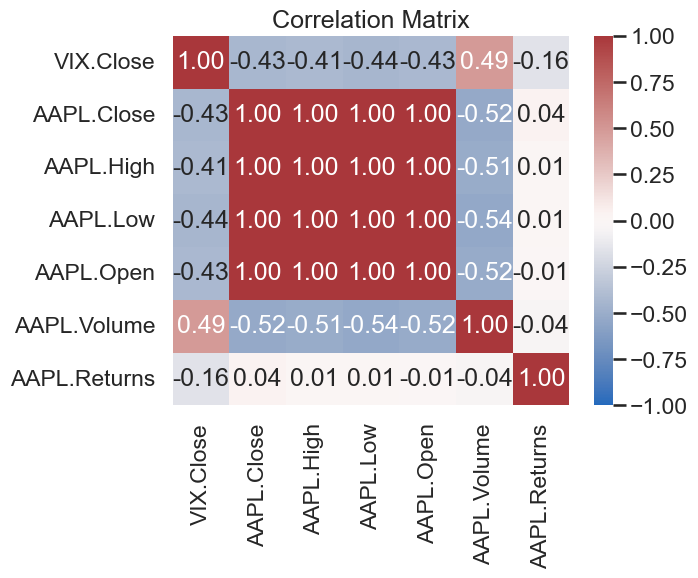

,VIX.Close,AAPL.Close,AAPL.High,AAPL.Low,AAPL.Open,AAPL.Volume,AAPL.Returns
VIX.Close,1.000000,-0.429994,-0.414604,-0.440647,-0.426427,0.486104,-0.156325
AAPL.Close,-0.429994,1.000000,0.998885,0.998829,0.997504,-0.523981,0.040753
AAPL.High,-0.414604,0.998885,1.000000,0.998379,0.998728,-0.509459,0.011870
AAPL.Low,-0.440647,0.998829,0.998379,1.000000,0.998883,-0.537627,0.014234
AAPL.Open,-0.426427,0.997504,0.998728,0.998883,1.000000,-0.523189,-0.012781
AAPL.Volume,0.486104,-0.523981,-0.509459,-0.537627,-0.523189,1.000000,-0.039567
AAPL.Returns,-0.156325,0.040753,0.011870,0.014234,-0.012781,-0.039567,1.000000


In [27]:
corr = df[cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt='.2f', cmap='vlag', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()
corr

## Insights(write your commentary)
- The VIX has a right skew, because most of the times markets are calm hence VIX is low and only on some rare ocassions does it go very high creating outliers, which is why the data has a heavy right tail.
- The Volume also has a right skew, because normally trading volumes dont change much, but on some rare ocassions there is a huge spike in increase trading volume due to many factors which cause a heavy right tail.
- The apple stock closing, high, low and open price are all highly correlated as expected 
- The returns of teh stock are most closely normally distributed.
- From the boxplot for VIX, Volume, and returns we can see that they show a lot of outliers, which is probably not noise but true data.
## Assumptions and risks
- We have assumed the accuracy from source of our data yfinance.
- Risk of getting unstable coefficients if we use the given data which shows multicollinearity.
- We also run the risk of having our model overfit, when we add a lot of columns with no new information.
- We must not just refer to IQR/Z-score to check for outliers and treat them as they sometimes refer to true data, as in the case of VIX, Volume and Returns.
## Next steps before modeling (cleaning & features)
- We can try to reduce dimensions of our independent variables using PCA
- We can try to introduce new features into the set of independent variables to get a better prediction.